# This is Feature Engineering Module.

* Objectives of this module includes creating new effective features based on our scraped features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# view additional data frame columns
pd.set_option('display.max_columns', 100)

# display plots in the notebook
%matplotlib inline

# load the cleaned dataset
df = pd.read_csv('datas/cleaned_data.csv')

## Developing new features and consolidating sparse classes into a one single classes.

In [2]:
# Use arithmetic to construct new features 
df['Нас'] = 2024 - df['Ашиглалтанд орсон он:']

# Check for improper data values
df['Нас'].describe()

count    6377.000000
mean        7.625686
std         9.273378
min        -1.000000
25%         1.000000
50%         5.000000
75%        11.000000
max        44.000000
Name: Нас, dtype: float64

In [3]:
# Determine the number of observations that have descrepancies
df['Нас'].lt(0).sum()

65

In [4]:
# Remove observations that are negative in property age
df = df[df['Нас'] >= 0]

# review the remaining observations
df.head()

,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,PricePerArea,Нас
0,141.4,"УБ — Баянзүрх, Амгалан",Паркет,1,2024,0,Вакум,16,Бүргэд,50.50,3,0,2,0.0,2.800000,0
1,180.0,"УБ — Чингэлтэй, Баянбүрд",Паркет,1,2014,0,Вакум,12,Бүргэд,50.00,7,0,2,1.0,3.600000,10
3,145.0,"УБ — Баянзүрх, Улаанхуаран",Паркет,1,2016,0,Вакум,12,Бүргэд,50.32,8,0,3,1.0,2.881558,8
4,160.0,"УБ — Баянгол, 25-р эмийн сан",Паркет,0,2008,0,Вакум,6,Бүргэд,60.00,6,1,4,1.0,2.666667,16
5,210.0,"УБ — Сүхбаатар, Сүхбаатар, Хороо 8",Паркет,1,2015,0,Вакум,16,Төмөр,49.50,3,0,2,1.0,4.242424,9


### New feature outlier removal

In [5]:
df['Нас'].describe()

count    6312.000000
mean        7.714512
std         9.279388
min         0.000000
25%         1.000000
50%         5.000000
75%        11.000000
max        44.000000
Name: Нас, dtype: float64

In [6]:
iqr = df['Нас'].quantile(0.75) - df['Нас'].quantile(0.25)
upper = df['Нас'].quantile(0.75) + 1.5 * iqr
upper

26.0

In [7]:
df = df[df['Нас'] < upper]
df.shape

(5893, 16)

In [8]:
df['үнэ'].describe()

count    5893.000000
mean      268.956144
std       152.474817
min        45.000000
25%       155.000000
50%       220.500000
75%       350.000000
max       825.000000
Name: үнэ, dtype: float64

In [9]:
df

,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,PricePerArea,Нас
0,141.4,"УБ — Баянзүрх, Амгалан",Паркет,1,2024,0,Вакум,16,Бүргэд,50.50,3,0,2,0.0,2.800000,0
1,180.0,"УБ — Чингэлтэй, Баянбүрд",Паркет,1,2014,0,Вакум,12,Бүргэд,50.00,7,0,2,1.0,3.600000,10
3,145.0,"УБ — Баянзүрх, Улаанхуаран",Паркет,1,2016,0,Вакум,12,Бүргэд,50.32,8,0,3,1.0,2.881558,8
4,160.0,"УБ — Баянгол, 25-р эмийн сан",Паркет,0,2008,0,Вакум,6,Бүргэд,60.00,6,1,4,1.0,2.666667,16
5,210.0,"УБ — Сүхбаатар, Сүхбаатар, Хороо 8",Паркет,1,2015,0,Вакум,16,Төмөр,49.50,3,0,2,1.0,4.242424,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6372,610.0,"УБ — Баянзүрх, Баянзүрх, Хороо 26",Паркет,1,2020,1,Вакум,16,Бүргэд,122.00,11,0,4,1.0,5.000000,4
6373,90.0,"УБ — Сонгинохайрхан, Толгойт",Паркет,1,2017,0,Вакум,9,Бүргэд,38.00,8,0,3,1.0,2.368421,7
6374,150.0,"УБ — Баянзүрх, Сансар",Паркет,0,2019,0,Вакум,12,Бүргэд,41.00,6,0,1,1.0,3.658537,5
6375,218.7,"УБ — Баянгол, 3, 4 хороолол",Паркет,1,2024,1,Вакум,16,Бүргэд,73.00,9,1,4,0.0,2.995890,0


### New Feature District Creation

In [10]:
# Let's create a new feature called "District", in order to have an easier to work with data.

# Extract district by splitting the address on the comma and taking the first part
df['Дүүрэг'] = df['хаяг'].str.split(',', expand=True)[0].str.strip()
df = df[df['Дүүрэг'].str.startswith('УБ —')]
df['Дүүрэг'] = df['Дүүрэг'].str.replace('УБ - ', '')

df['хаяг'] = df['хаяг'].str.split(',', n=1).str[1].str.strip()

df['хаяг'] = df['хаяг'].fillna(0)
df

/var/folders/k5/d_ccjpd550q3sskv2xjl_mxc0000gn/T/ipykernel_23412/1712540490.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Дүүрэг'] = df['Дүүрэг'].str.replace('УБ - ', '')
/var/folders/k5/d_ccjpd550q3sskv2xjl_mxc0000gn/T/ipykernel_23412/1712540490.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['хаяг'] = df['хаяг'].str.split(',', n=1).str[1].str.strip()
/var/folders/k5/d_ccjpd550q3sskv2xjl_mxc0000gn/T/ipykernel_23412/1712540490.py:10: SettingWithCopyWarning: 
A value is trying to be set on a

,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,PricePerArea,Нас,Дүүрэг
0,141.4,Амгалан,Паркет,1,2024,0,Вакум,16,Бүргэд,50.50,3,0,2,0.0,2.800000,0,УБ — Баянзүрх
1,180.0,Баянбүрд,Паркет,1,2014,0,Вакум,12,Бүргэд,50.00,7,0,2,1.0,3.600000,10,УБ — Чингэлтэй
3,145.0,Улаанхуаран,Паркет,1,2016,0,Вакум,12,Бүргэд,50.32,8,0,3,1.0,2.881558,8,УБ — Баянзүрх
4,160.0,25-р эмийн сан,Паркет,0,2008,0,Вакум,6,Бүргэд,60.00,6,1,4,1.0,2.666667,16,УБ — Баянгол
5,210.0,"Сүхбаатар, Хороо 8",Паркет,1,2015,0,Вакум,16,Төмөр,49.50,3,0,2,1.0,4.242424,9,УБ — Сүхбаатар
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6372,610.0,"Баянзүрх, Хороо 26",Паркет,1,2020,1,Вакум,16,Бүргэд,122.00,11,0,4,1.0,5.000000,4,УБ — Баянзүрх
6373,90.0,Толгойт,Паркет,1,2017,0,Вакум,9,Бүргэд,38.00,8,0,3,1.0,2.368421,7,УБ — Сонгинохайрхан
6374,150.0,Сансар,Паркет,0,2019,0,Вакум,12,Бүргэд,41.00,6,0,1,1.0,3.658537,5,УБ — Баянзүрх
6375,218.7,"3, 4 хороолол",Паркет,1,2024,1,Вакум,16,Бүргэд,73.00,9,1,4,0.0,2.995890,0,УБ — Баянгол


### Consolidating sparse door classes into one 

In [11]:
df['Хаалга:'].value_counts()


Хаалга:
Бүргэд         4262
Төмөр          1250
Төмөр вакум     238
Вакум            94
Мод              36
Name: count, dtype: int64

In [12]:
#consolidate sparse classes into a one class
df['Хаалга:'].replace(to_replace=['Төмөр вакум', 'Төмөр'], value='Төмөр', inplace=True)
df['Хаалга:'].value_counts()


/var/folders/k5/d_ccjpd550q3sskv2xjl_mxc0000gn/T/ipykernel_23412/4130607074.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Хаалга:'].replace(to_replace=['Төмөр вакум', 'Төмөр'], value='Төмөр', inplace=True)
/var/folders/k5/d_ccjpd550q3sskv2xjl_mxc0000gn/T/ipykernel_23412/4130607074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

Хаалга:
Бүргэд    4262
Төмөр     1488
Вакум       94
Мод         36
Name: count, dtype: int64

In [13]:
#list classes to be replaced as other

other_roofs = ['Мод', 'Вакум']

# consolidate into the 'Other' class
df['Хаалга:'].replace(other_roofs, 'Бусад', inplace=True)
df['Хаалга:'].value_counts()


/var/folders/k5/d_ccjpd550q3sskv2xjl_mxc0000gn/T/ipykernel_23412/702916260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Хаалга:'].replace(other_roofs, 'Бусад', inplace=True)


Хаалга:
Бүргэд    4262
Төмөр     1488
Бусад      130
Name: count, dtype: int64

### Floor Consolidating

In [14]:
df['Шал:'].value_counts()

Шал:
Паркет     5726
Ламинат      78
Мод          38
Цемент       22
Плита        14
Чулуу         2
Name: count, dtype: int64

In [15]:
other_windows = ['Ламинат', 'Мод', 'Цемент', 'Плита', 'Чулуу']

# consolidate into the 'Other' class
df['Шал:'].replace(other_windows, 'Бусад', inplace=True)
df['Шал:'].value_counts()


/var/folders/k5/d_ccjpd550q3sskv2xjl_mxc0000gn/T/ipykernel_23412/3590597469.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Шал:'].replace(other_windows, 'Бусад', inplace=True)
/var/folders/k5/d_ccjpd550q3sskv2xjl_mxc0000gn/T/ipykernel_23412/3590597469.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Шал:'].replace(other_windows

Шал:
Паркет    5726
Бусад      154
Name: count, dtype: int64

### Window Consolidating

In [16]:
df['Цонх:'].value_counts()

Цонх:
Вакум          5706
Төмөр вакум     126
Модон вакум      36
Мод              12
Name: count, dtype: int64

In [17]:
other_windows = ['Төмөр вакум', 'Модон вакум', 'Мод']

# consolidate into the 'Other' class
df['Цонх:'].replace(other_windows, 'Бусад', inplace=True)
df['Цонх:'].value_counts()

/var/folders/k5/d_ccjpd550q3sskv2xjl_mxc0000gn/T/ipykernel_23412/185545625.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Цонх:'].replace(other_windows, 'Бусад', inplace=True)
/var/folders/k5/d_ccjpd550q3sskv2xjl_mxc0000gn/T/ipykernel_23412/185545625.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Цонх:'].replace(other_windows

Цонх:
Вакум    5706
Бусад     174
Name: count, dtype: int64

In [18]:
df['Цонхны тоо:'].describe()

count    5880.000000
mean        3.251701
std         1.267939
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         8.000000
Name: Цонхны тоо:, dtype: float64

## Remove Unused

Remove unused or redundant columns from the table

* Now given that we've created a new Property age feature we can remove property year feature.

In [19]:
df = df.drop(columns=['Ашиглалтанд орсон он:'])
df.head()

,үнэ,хаяг,Шал:,Тагт:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,PricePerArea,Нас,Дүүрэг
0,141.4,Амгалан,Паркет,1,0,Вакум,16,Бүргэд,50.50,3,0,2,0.0,2.800000,0,УБ — Баянзүрх
1,180.0,Баянбүрд,Паркет,1,0,Вакум,12,Бүргэд,50.00,7,0,2,1.0,3.600000,10,УБ — Чингэлтэй
3,145.0,Улаанхуаран,Паркет,1,0,Вакум,12,Бүргэд,50.32,8,0,3,1.0,2.881558,8,УБ — Баянзүрх
4,160.0,25-р эмийн сан,Паркет,0,0,Вакум,6,Бүргэд,60.00,6,1,4,1.0,2.666667,16,УБ — Баянгол
5,210.0,"Сүхбаатар, Хороо 8",Паркет,1,0,Вакум,16,Төмөр,49.50,3,0,2,1.0,4.242424,9,УБ — Сүхбаатар


In [20]:
df.shape

(5880, 16)

## Creating new feature called Category to indicate which part of the district our apartment is

In [21]:
hanuul = df[df['Дүүрэг'] == 'УБ — Хан-Уул']

hanuul['price_per_area'] = hanuul['үнэ'] / hanuul['Талбай:']
# Calculate the mean prices for each address
mean_prices_p = hanuul.groupby('хаяг')['price_per_area'].mean().reset_index()
mean_prices_p.columns = ['Address', 'MeanPricePerArea']

# Sort the data for better visualization
mean_prices_p = mean_prices_p.sort_values(by='MeanPricePerArea', ascending=False)
hanuul.shape

/var/folders/k5/d_ccjpd550q3sskv2xjl_mxc0000gn/T/ipykernel_23412/3766401259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hanuul['price_per_area'] = hanuul['үнэ'] / hanuul['Талбай:']


(2453, 17)

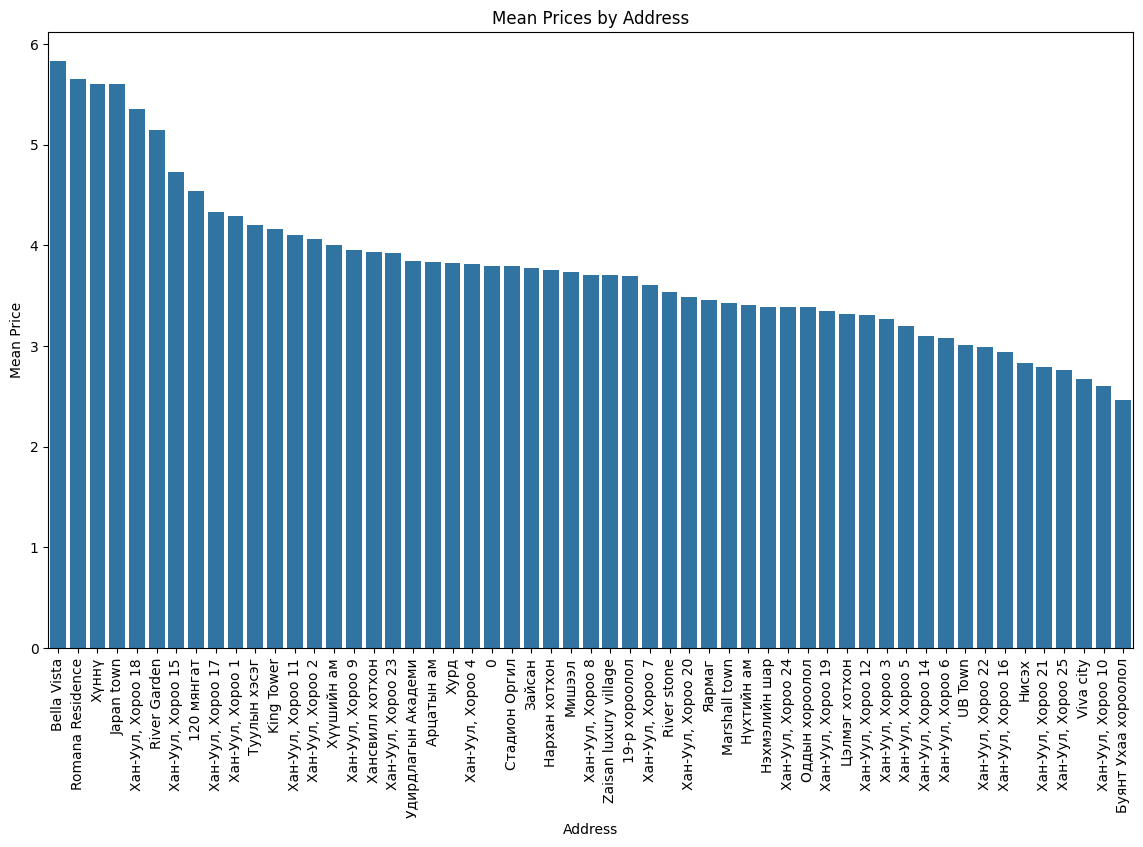

In [22]:
# Set the figure size for better readability
plt.figure(figsize=(14, 8))

# Create the bar plot
sns.barplot(x='Address', y='MeanPricePerArea', data=mean_prices_p)

# Rotate the x labels for better readability
plt.xticks(rotation=90)

# Set the title and labels
plt.title('Mean Prices by Address')
plt.xlabel('Address')
plt.ylabel('Mean Price')

# Display the plot
plt.show()

In [23]:
mean_prices_p['MeanPricePerArea'].describe()

count    55.000000
mean      3.770976
std       0.790855
min       2.463011
25%       3.312114
50%       3.708458
75%       4.030088
max       5.825243
Name: MeanPricePerArea, dtype: float64

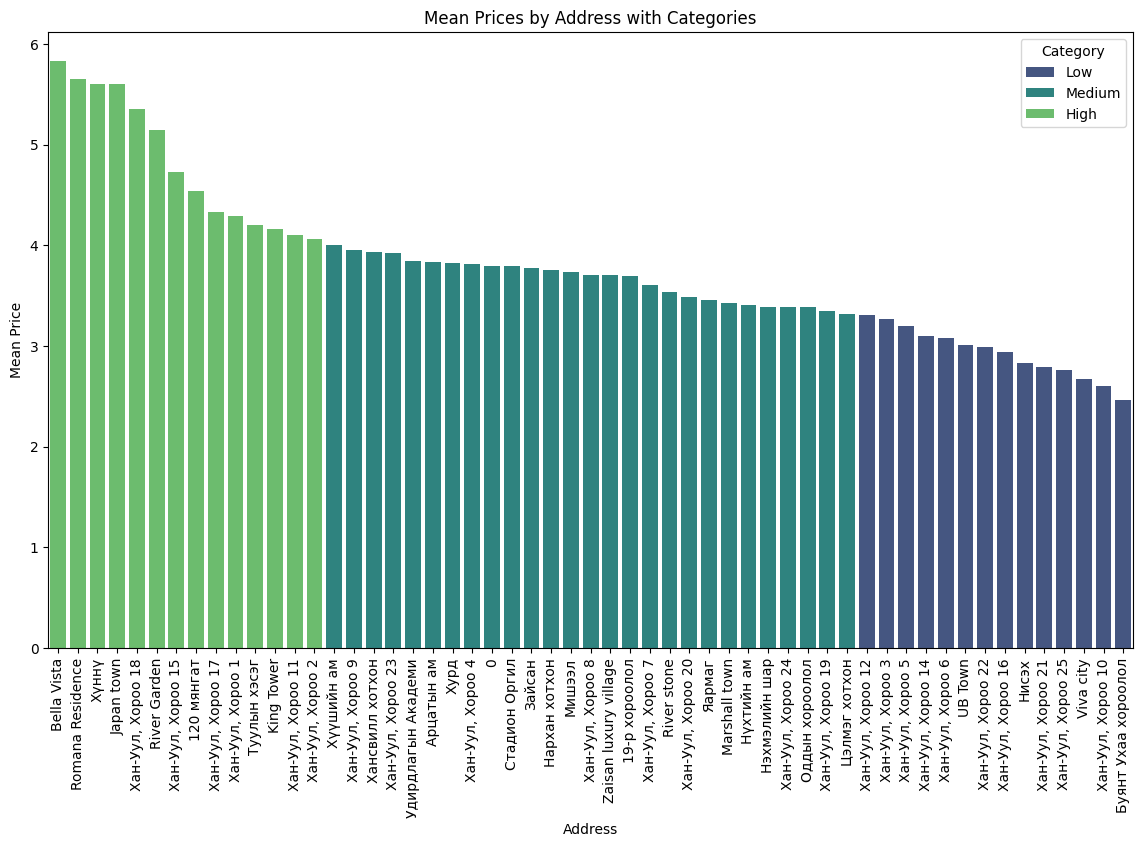

In [24]:
bin_edges = [mean_prices_p['MeanPricePerArea'].min(), mean_prices_p['MeanPricePerArea'].quantile(0.25), mean_prices_p['MeanPricePerArea'].quantile(0.75), mean_prices_p['MeanPricePerArea'].max()]

# Cut the data into three bins based on the custom bin edges
mean_prices_p['Category'] = pd.cut(mean_prices_p['MeanPricePerArea'], bins=bin_edges, labels=['Low', 'Medium', 'High'], include_lowest=True)

# Set the categories for the 'Category' column in mean_prices
mean_prices_p['Category'] = mean_prices_p['Category'].cat.set_categories(['Low', 'Medium', 'High'])


# Plot the categorized data
plt.figure(figsize=(14, 8))

# Create the bar plot with colors based on categories
sns.barplot(x='Address', y='MeanPricePerArea', hue='Category', data=mean_prices_p, dodge=False, palette='viridis')

# Rotate the x labels for better readability
plt.xticks(rotation=90)

# Set the title and labels
plt.title('Mean Prices by Address with Categories')
plt.xlabel('Address')
plt.ylabel('Mean Price')

# Display the legend
plt.legend(title='Category')

# Display the plot
plt.show()

In [25]:
df.shape

(5880, 16)

In [26]:
df.head()

,үнэ,хаяг,Шал:,Тагт:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,PricePerArea,Нас,Дүүрэг
0,141.4,Амгалан,Паркет,1,0,Вакум,16,Бүргэд,50.50,3,0,2,0.0,2.800000,0,УБ — Баянзүрх
1,180.0,Баянбүрд,Паркет,1,0,Вакум,12,Бүргэд,50.00,7,0,2,1.0,3.600000,10,УБ — Чингэлтэй
3,145.0,Улаанхуаран,Паркет,1,0,Вакум,12,Бүргэд,50.32,8,0,3,1.0,2.881558,8,УБ — Баянзүрх
4,160.0,25-р эмийн сан,Паркет,0,0,Вакум,6,Бүргэд,60.00,6,1,4,1.0,2.666667,16,УБ — Баянгол
5,210.0,"Сүхбаатар, Хороо 8",Паркет,1,0,Вакум,16,Төмөр,49.50,3,0,2,1.0,4.242424,9,УБ — Сүхбаатар


In [27]:
df['үнэ'].describe()

count    5880.000000
mean      269.125852
std       152.459337
min        45.000000
25%       155.000000
50%       220.808000
75%       350.000000
max       825.000000
Name: үнэ, dtype: float64

In [28]:
df['хаяг'].describe()

count       5880
unique       251
top       Яармаг
freq         601
Name: хаяг, dtype: object

In [29]:
df = df[df['хаяг'] != 0]
df.shape

(5741, 16)

In [30]:
df['PricePerArea'] = df['үнэ'] / df['Талбай:']
mean_prices = df.groupby(['Дүүрэг', 'хаяг'])['PricePerArea'].mean().reset_index(name='MeanPrice')
pd.reset_option('display.max_rows')
mean_prices[mean_prices['хаяг'] == 'Офицер']

,Дүүрэг,хаяг,MeanPrice
93,УБ — Баянзүрх,Офицер,2.93895


In [31]:
# Define a function to categorize each district
def categorize_district(district_df):
    Q1 = district_df['MeanPrice'].quantile(0.25)
    Q3 = district_df['MeanPrice'].quantile(0.75)
    min_val = district_df['MeanPrice'].min()
    max_val = district_df['MeanPrice'].max()
    
    bins = [min_val, Q1, Q3, max_val]
    
    # Ensure bin edges are unique
    if len(set(bins)) < len(bins):
        district_df['Category'] = 'Medium'  # Default category if bin edges are not unique
    else:
        labels = ['Low', 'Medium', 'High']
        district_df['Category'] = pd.cut(district_df['MeanPrice'], bins=bins, labels=labels, include_lowest=True)
    
    return district_df

# Apply the function to each district
categorized_mean_prices = mean_prices.groupby('Дүүрэг').apply(categorize_district)
categorized_mean_prices.head(50)



/var/folders/k5/d_ccjpd550q3sskv2xjl_mxc0000gn/T/ipykernel_23412/1977018517.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  categorized_mean_prices = mean_prices.groupby('Дүүрэг').apply(categorize_district)


Дүүрэг                                хаяг  \
Дүүрэг                                                                
УБ — Багануур 0   УБ — Багануур                   Багануур, Хороо 3   
УБ — Баянгол  1    УБ — Баянгол                       10-р хороолол   
              2    УБ — Баянгол                      25-р эмийн сан   
              3    УБ — Баянгол                       3, 4 хороолол   
              4    УБ — Баянгол                        4-р хороолол   
              5    УБ — Баянгол                           6-р бичил   
              6    УБ — Баянгол                        Алтай хотхон   
              7    УБ — Баянгол                        Баруун 4 зам   
              8    УБ — Баянгол                    Баянгол, Хороо 1   
              9    УБ — Баянгол                   Баянгол, Хороо 10   
              10   УБ — Баянгол                   Баянгол, Хороо 11   
              11   УБ — Баянгол                   Баянгол, Хороо 12   
              12   УБ — Баянгол                   Баянгол, Хороо 13   
              13   УБ — Баянгол                   Баянгол, Хороо 16   
              14   УБ — Баянгол                   Баянгол, Хороо 17   
              15   УБ — Баянгол                   Баянгол, Хороо 18   
              16   УБ — Баянгол                   Баянгол, Хороо 19   
              17   УБ — Баянгол                    Баянгол, Хороо 2   
              18   УБ — Баянгол                   Баянгол, Хороо 20   
              19   УБ — Баянгол                   Баянгол, Хороо 23   
              20   УБ — Баянгол                    Баянгол, Хороо 3   
              21   УБ — Баянгол                    Баянгол, Хороо 4   
              22   УБ — Баянгол                    Баянгол, Хороо 5   
              23   УБ — Баянгол                    Баянгол, Хороо 6   
              24   УБ — Баянгол                    Баянгол, Хороо 7   
              25   УБ — Баянгол                    Баянгол, Хороо 8   
              26   УБ — Баянгол                    Баянгол, Хороо 9   
              27   УБ — Баянгол                               Бичил   
              28   УБ — Баянгол                             Богд-Ар   
              29   УБ — Баянгол                              Гандан   
              30   УБ — Баянгол  Гэмтэл согог судлалын үндэсний төв   
              31   УБ — Баянгол                             Модны 2   
              32   УБ — Баянгол                      Нарны хороолол   
              33   УБ — Баянгол                     Тээврийн товчоо   
              34   УБ — Баянгол                           Төмөр зам   
              35   УБ — Баянгол                     Хорооллын Имарт   
              36   УБ — Баянгол                   Эх нялхас эмнэлэг   
              37   УБ — Баянгол                Өргөө - 1 кино театр   
УБ — Баянзүрх 38  УБ — Баянзүрх                       13-р хороолол   
              39  УБ — Баянзүрх                       14-р хороолол   
              40  УБ — Баянзүрх                       15-р хороолол   
              41  УБ — Баянзүрх                       16-р хороолол   
              42  УБ — Баянзүрх            84-р сургуулийн ойролцоо   
              43  УБ — Баянзүрх                     Olympic village   
              44  УБ — Баянзүрх                             Sunrise   
              45  УБ — Баянзүрх                             Амгалан   
              46  УБ — Баянзүрх                     Баянзүрх дүүрэг   
              47  УБ — Баянзүрх                   Баянзүрх, Хороо 1   
              48  УБ — Баянзүрх                  Баянзүрх, Хороо 10   
              49  УБ — Баянзүрх                  Баянзүрх, Хороо 11   

                  MeanPrice Category  
Дүүрэг                                
УБ — Багануур 0    5.172414   Medium  
УБ — Баянгол  1    3.069342   Medium  
              2    3.162285   Medium  
              3    3.256810   Medium  
              4    4.239911     High  
              5    3.252854   Medium  
              6    3

In [32]:
# Merge the categories back to the original dataframe
a = df.merge(categorized_mean_prices[['хаяг', 'Category']], on='хаяг', how='left')

a.shape

(5741, 17)

## Floor inconsistencies and new feature called floor ratio

In [33]:
a = a[a['Хэдэн давхарт:'] > 0]

# Create the new feature 'floor_ratio'
a['floor_ratio'] = a['Хэдэн давхарт:'] / a['Барилгын давхар:']

## Do one-hot encoder for categorical values

In [34]:
a['Цонх:'].unique()

array(['Вакум', 'Бусад'], dtype=object)

In [35]:
a.head()

,үнэ,хаяг,Шал:,Тагт:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,PricePerArea,Нас,Дүүрэг,Category,floor_ratio
0,141.4,Амгалан,Паркет,1,0,Вакум,16,Бүргэд,50.50,3,0,2,0.0,2.800000,0,УБ — Баянзүрх,Low,0.187500
1,180.0,Баянбүрд,Паркет,1,0,Вакум,12,Бүргэд,50.00,7,0,2,1.0,3.600000,10,УБ — Чингэлтэй,Low,0.583333
2,145.0,Улаанхуаран,Паркет,1,0,Вакум,12,Бүргэд,50.32,8,0,3,1.0,2.881558,8,УБ — Баянзүрх,Medium,0.666667
3,160.0,25-р эмийн сан,Паркет,0,0,Вакум,6,Бүргэд,60.00,6,1,4,1.0,2.666667,16,УБ — Баянгол,Medium,1.000000
4,210.0,"Сүхбаатар, Хороо 8",Паркет,1,0,Вакум,16,Төмөр,49.50,3,0,2,1.0,4.242424,9,УБ — Сүхбаатар,Medium,0.187500


In [36]:
a = pd.get_dummies(a, columns=['Цонх:', 'Дүүрэг', 'Хаалга:', 'Шал:', 'Category'])
a.filter(like='Дүүрэг').head(5)

,Дүүрэг_УБ — Багануур,Дүүрэг_УБ — Баянгол,Дүүрэг_УБ — Баянзүрх,Дүүрэг_УБ — Налайх,Дүүрэг_УБ — Сонгинохайрхан,Дүүрэг_УБ — Сүхбаатар,Дүүрэг_УБ — Хан-Уул,Дүүрэг_УБ — Чингэлтэй
0,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False


In [37]:
a.shape

(5741, 31)

## Distribution of Numerical Features
    Let's see distribution of numerical features.
    

In [38]:
a.columns = a.columns.str.replace('_', '-')
a.columns = a.columns.str.replace(':', '')
a.columns = a.columns.str.replace('—', '')

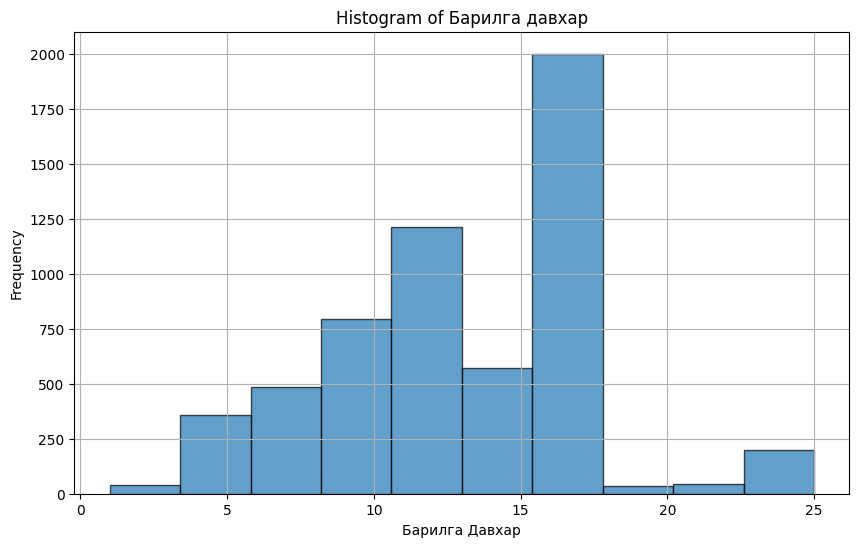

In [39]:
plt.figure(figsize=(10, 6))
plt.hist(a['Барилгын давхар'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Histogram of Барилга давхар')
plt.xlabel('Барилга Давхар')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

As you can see distribution is not normal so let's try transforming with log 

In [40]:
# new feature by taking log from total floor

a['totalfloorlog'] = np.log(a['Барилгын давхар'])

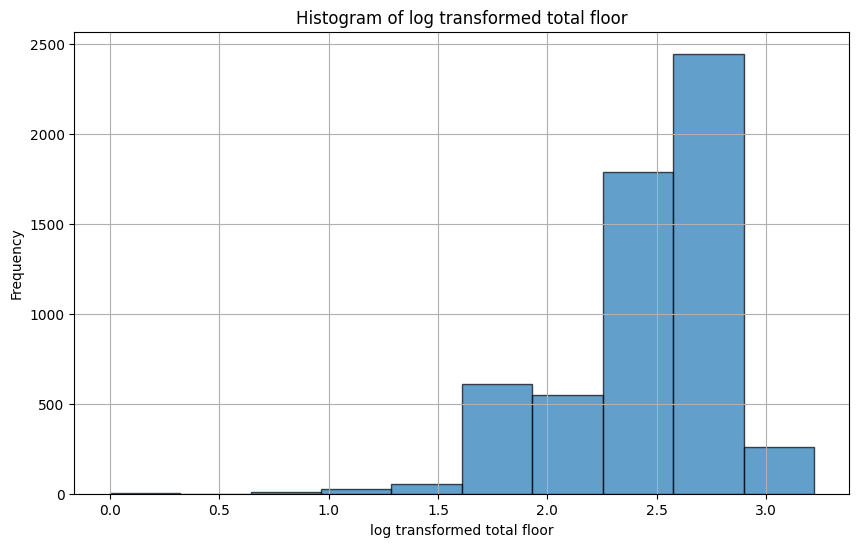

In [41]:
# see the distribution 
plt.figure(figsize=(10, 6))
plt.hist(a['totalfloorlog'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Histogram of log transformed total floor')
plt.xlabel('log transformed total floor')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

A bit better so let's keep this


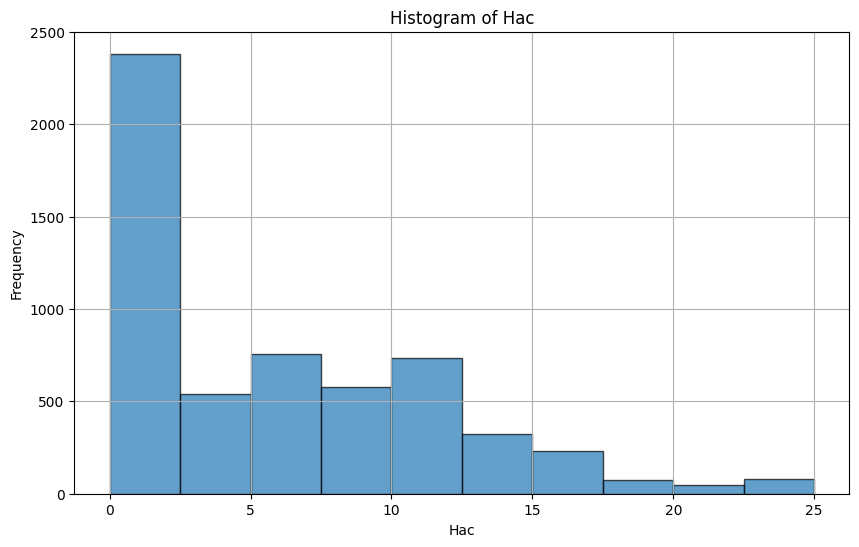

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(a['Нас'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Histogram of Нас')
plt.xlabel('Нас')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Let's try taking log from this too.

In [43]:
#since there are many new buildings with age 0, let's add a constant to it to get a proper values
a['agelog'] = a['Нас'] + 2
a['agelog'] = np.log(a['agelog'])

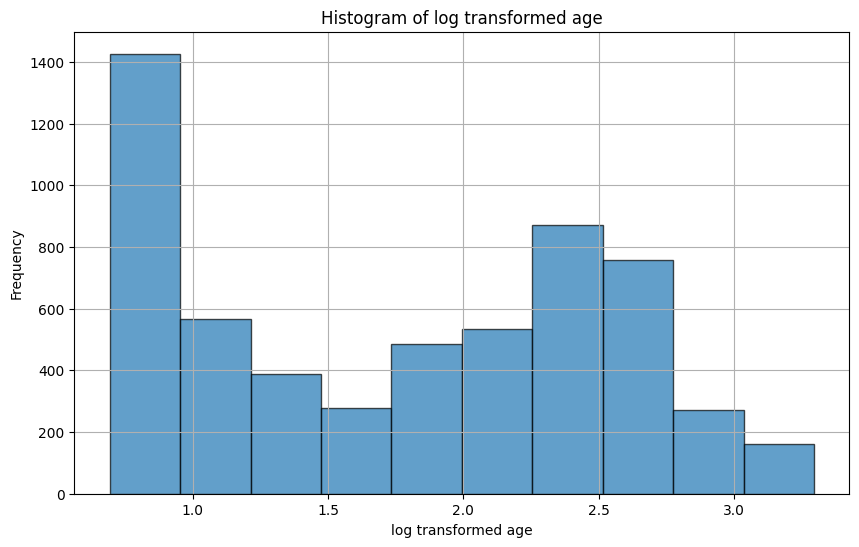

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(a['agelog'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Histogram of log transformed age')
plt.xlabel('log transformed age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Let's try ordinal encoding specific location 

In [46]:
from sklearn.preprocessing import OrdinalEncoder

ordencode = OrdinalEncoder()

a['Specific_Location_Encoded'] = ordencode.fit_transform(a[['хаяг']])

In [47]:
a.head()

,үнэ,хаяг,Тагт,Гараж,Барилгын давхар,Талбай,Хэдэн давхарт,Лизингээр авах боломж,Цонхны тоо,Барилгын явц,PricePerArea,Нас,floor-ratio,Цонх-Бусад,Цонх-Вакум,Дүүрэг-УБ Багануур,Дүүрэг-УБ Баянгол,Дүүрэг-УБ Баянзүрх,Дүүрэг-УБ Налайх,Дүүрэг-УБ Сонгинохайрхан,Дүүрэг-УБ Сүхбаатар,Дүүрэг-УБ Хан-Уул,Дүүрэг-УБ Чингэлтэй,Хаалга-Бусад,Хаалга-Бүргэд,Хаалга-Төмөр,Шал-Бусад,Шал-Паркет,Category-High,Category-Low,Category-Medium,totalfloorlog,agelog,Specific_Location_Encoded
0,141.4,Амгалан,1,0,16,50.50,3,0,2,0.0,2.800000,0,0.187500,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False,2.772589,0.693147,39.0
1,180.0,Баянбүрд,1,0,12,50.00,7,0,2,1.0,3.600000,10,0.583333,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False,2.484907,2.484907,46.0
2,145.0,Улаанхуаран,1,0,12,50.32,8,0,3,1.0,2.881558,8,0.666667,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,2.484907,2.302585,189.0
3,160.0,25-р эмийн сан,0,0,6,60.00,6,1,4,1.0,2.666667,16,1.000000,False,True,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,1.791759,2.890372,13.0
4,210.0,"Сүхбаатар, Хороо 8",1,0,16,49.50,3,0,2,1.0,4.242424,9,0.187500,False,True,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,2.772589,2.397895,179.0


In [48]:
a.to_csv('datas/training_data.csv')